### 0.import library and set configration

In [7]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
# „Ç∞„É©„Éï„Çí„Ç§„É≥„É©„Ç§„É≥„ÅßË°®Á§∫„Åï„Åõ„Çã
import matplotlib.pyplot as plt
import japanize_matplotlib #Êó•Êú¨Ë™ûÂåñmatplotlib
%matplotlib inline

import seaborn as sns
sns.set(font="IPAexGothic") #Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö

from ydata_profiling import ProfileReport

import warnings
# ÂÖ®„Å¶„ÅÆË≠¶Âëä„ÇíÁÑ°Ë¶ñ„Åô„Çã
warnings.filterwarnings("ignore")

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Ê©üÊ¢∞Â≠¶ÁøíÁî®„ÅÆ„É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import optuna
import shap


In [5]:
#import_original_function
from function.data_processing import test2
from function.data_processing import addtional_process
from function.modeling import objective

In [6]:
#pandas„ÅÆË°®Á§∫Ë®≠ÂÆö
# Ë°®Á§∫Âà∂Èôê„ÅÆÁ∑©Âíå
pd.set_option('display.max_columns', 300 )
pd.set_option('display.max_rows', 500 )
# ÊåáÊï∞Ë°®Ë®ò„ÅÆÁÑ°ÂäπÂåñ
pd.options.display.float_format = '{:.2f}'.format

In [12]:
#config„Éï„Ç°„Ç§„É´„ÅÆË™≠„ÅøËæº„Åø
import configparser
config_ini = configparser.ConfigParser()
config_ini.read('./config/config.ini', encoding='utf-8')

['./config/config.ini']

In [13]:
#read_file_congfig
test_file = config_ini["INPUT_FILE"]["test"]
train_file = config_ini["INPUT_FILE"]["train"]
deginition_file = config_ini["CONFIG_FILE"]["deginition"]
submit_file = config_ini["OUTPUT_FILE"]["submit"]
shap_plot_file = config_ini["OUTPUT_FILE"]["shap_plot"]
#read_var_config
response_var = config_ini["VAR"]["response_var"]
#read_other_info
version = config_ini["VERSION"]["version"]


In [17]:
#make_output_folder
ouput_folder_path  = f"./output/ver{version}"
os.makedirs(ouput_folder_path, exist_ok=True) 

### 1.import_train/test_data


In [9]:
#„Éá„Éº„Çø„ÅÆÊàêÂûãÊñπÊ≥ï„ÇíË™≠Ëæº
df_deginition  = pd.read_excel(deginition_file,index_col=0, dtype = 'object')
df_deginition  = df_deginition.query('Êé°Âê¶ == "‚óé"|Êé°Âê¶ == "„Äá"| Êé°Âê¶ == "‚ñ≥"')

#Â≠¶Áøí„Å´‰Ωø„ÅÜ„Ç´„É©„É†„ÇíÈÅ∏Êäû
target_columns = df_deginition["Êú¨Áï™„Éá„Éº„ÇøÁâπÂæ¥ÈáèÂêç"].values.tolist()

# #ÁõÆÁöÑÂ§âÊï∞Âêç„ÇíË®≠ÂÆö
# response_var = "money_room"

In [10]:
# ÂØæË±°„ÅÆCSV„Éá„Éº„Çø„ÅÆË™≠Ëæº
df_train_raw = pd.read_csv(train_file , header=0,sep=',' , dtype = 'object')
df_test_raw  = pd.read_csv(test_file  , header=0,sep=',' , dtype = 'object')

### 2.data_processing

#### 2-1.select_varriables

In [11]:
# ÂØæË±°„Ç´„É©„É†„ÇíÁµû„ÇäËæº„Åø
df_train = df_train_raw[target_columns]
df_test = df_test_raw[[col for col in target_columns if not col == response_var]]

# ÊäΩÂá∫ÁµêÊûú„ÇíË°®Á§∫
display(df_train.head(2))
display(df_test.head(2))

money_room building_status building_type unit_count building_structure  \
0      38000               1             3         22                  1   
1     103000               1             1        NaN                  4   

  floor_count year_built room_floor dwelling_unit_window_angle room_count  \
0           2     200210          2                          5          1   
1           3     197612          1                          5          2   

    unit_area bukken_type post1 post2 addr1_1 addr1_2 walk_distance1  \
0  23.1800003        3102   598    44      27     213           1040   
1  47.7000008        3101   173    36      13     119            320   

  walk_distance2 flg_new room_kaisuu snapshot_window_angle madori_number_all  \
0            NaN       0           2                     5                 1   
1            400       0           1                     5                 2   

  madori_kind_all parking_kubun genkyo_code convenience_distance  \
0              20             1           3                  239   
1              30             3           2                  399   

  super_distance  
0           1280  
1            434

building_status building_type unit_count building_structure floor_count  \
0               1             3          6                 10           2   
1               1             1         15                  4           3   

  year_built room_floor dwelling_unit_window_angle room_count   unit_area  \
0     201101          2                          6          2  62.5099983   
1     198703          3                          5          1  19.4400005   

  bukken_type post1 post2 addr1_1 addr1_2 walk_distance1 walk_distance2  \
0        3102   756    57      35     216            160            NaN   
1        3101   182     7      13     208            240            800   

  flg_new room_kaisuu snapshot_window_angle madori_number_all madori_kind_all  \
0       0           2                     5                 2              50   
1       0           3                     5                 1              20   

  parking_kubun genkyo_code convenience_distance super_distance  
0             1           2                  NaN            NaN  
1             4           3                  190             30

#### 2-2.replace data_type and NA

In [12]:
#ÂâçÂá¶ÁêÜÔºà„Éá„Éº„ÇøÂûãÂ§âÊèõ„ÄÅË£úÂÆåÔºâ

# Ê¨†ÊêçÂÄãÊâÄ„ÇíNA„Å®„ÅÑ„ÅÜÊñáÂ≠óÂàó„ÅßÁΩÆÊèõ
df_train = df_train.fillna("NA")
df_test = df_test.fillna("NA")

for idx ,raw  in df_deginition.iterrows():
    #„Éá„Éº„Çø„ÅÆÂ§âÊèõÂØæË±°„ÄÅÂ§âÊèõÊñπÊ≥ï„ÇíÁ¢∫Ë™ç
    col = raw["Êú¨Áï™„Éá„Éº„ÇøÁâπÂæ¥ÈáèÂêç"]
    complement_value = raw["Ê¨†ÊêçË£úÂÆåÊñπÊ≥ï"]
    type = raw["„Éá„Éº„ÇøÂûã"]

    #Ë£úÂÆåÂÄ§„ÅåÁ©∫„Åß„Å™„Åë„Çå„Å∞Ë£úÂÆå
    if complement_value != np.nan : 
        try:
            df_train[col] = df_train[col].replace("NA",complement_value)
        except Exception as e:
            print("Ë£úÂÆå",col,complement_value,type)
            print(f"„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åü: {e}")
        try:
            df_test[col] = df_test[col].replace("NA",complement_value)
        except Exception as e:
            print("Ë£úÂÆå",col,complement_value,type)
            print(f"„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åü: {e}")

    #„Éá„Éº„ÇøÂûãÂ§âÊèõ
    try:
        df_train[col] = df_train[col].astype(type)
    except Exception as e:
        print("ÁΩÆÊèõ",col,complement_value,type)
        print(f"„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åü: {e}")
    try:
        df_test[col]  = df_test[col].astype(type)
    except Exception as e:
        print("ÁΩÆÊèõ",col,complement_value,type)
        print(f"„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åü: {e}")



Ë£úÂÆå money_room 0 int
„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åü: 'money_room'
ÁΩÆÊèõ money_room 0 int
„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åü: 'money_room'


#### 2-3.additional_processing

In [13]:
#ÁâπÊÆäÂâçÂá¶ÁêÜ
df_train = addtional_process(df_train)
df_test  = addtional_process(df_test)

In [18]:
#train_data„ÅÆ„ÅøËøΩÂä†Âá¶ÁêÜ

# Êù±‰∫¨ÈÉΩÔºàaddr1_1=13Ôºâ‰ª•Â§ñ„ÅÆ100‰∏áÂÜÜ‰ª•‰∏ä„ÅÆ„Éá„Éº„Çø„Çí‰∏≠Â§ÆÂÄ§„ÅÆ52000ÂÜÜ„ÅßÁΩÆÊèõ
df_train.loc[(df_train['addr1_1'] != '13') & (df_train['money_room'] >= 1000000), 'money_room'] = df_train['money_room'].median()

df_train["unit_area"] = df_train["unit_area"].fillna(0)
df_train["unit_area"] = df_train["unit_area"].astype(type)

# # df_train['unit_area']„Åå300‰ª•‰∏ä„ÄÅdf_train['money_room']„Åå50‰∏áÂÜÜ‰ª•‰∏ã„ÅÆÁâ©‰ª∂„Çí‰∏≠Â§ÆÂÄ§„ÅßÁΩÆÊèõ
df_train.loc[(df_train['unit_area'] >= 300) & (df_train['money_room'] < 500000), 'unit_area'] = df_train['unit_area'].median()

# year_built„Åå70‰ª•‰∏ä„ÅÆÁâ©‰ª∂„Çí„ÄÅyear_built„ÅÆ‰∏≠Â§ÆÂÄ§„ÅßÁΩÆÊèõ
df_train.loc[df_train['year_built'] > 70, 'year_built'] = df_train['year_built'].median()

# floor_count„Åå70‰ª•‰∏ä„ÅÆÁâ©‰ª∂„Çí„ÄÅfloor_count„ÅÆ‰∏≠Â§ÆÂÄ§„ÅßÁΩÆÊèõ
df_train.loc[df_train['floor_count'] > 64, 'floor_count'] = df_train['floor_count'].median()


#### 2-4.validation

In [15]:
# ‰∫àÊ∏¨ÂØæË±°„ÅÆ„Éá„Éº„Çø„ÇíÂ≠¶ÁøíÁî®„Å®Ë©ï‰æ°Áî®„Å´ÂàÜÂâ≤Ôºà„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Ôºâ
df_x = df_train.loc[:, df_train.columns!= response_var]
df_x = pd.get_dummies(df_x, dtype='int')
df_y = df_train[response_var]

# Â≠¶ÁøíÁî®ÔºöË©ï‰æ°Áî®„Åå70%Ôºö30%
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)

### 3.modeling & evaluation

ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø: {'learning_rate': 0.09941567665487275, 'num_leaves': 96, 'min_data_in_leaf': 20, 'feature_fraction': 0.8122796868613757, 'bagging_fraction': 0.9619256820739549, 'bagging_freq': 1}
ÊúÄÁµÇ„É¢„Éá„É´„ÅÆRMSE: 12296.753196601447


<Axes: xlabel='money_room'>

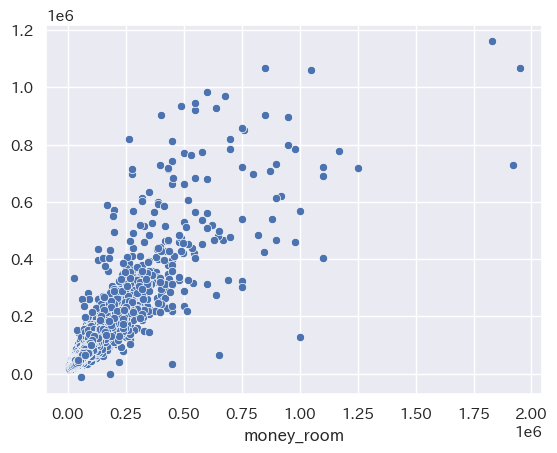

In [ ]:
# Optuna„Å´„Çà„Çã„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„ÅÆÊúÄÈÅ©Âåñ
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, df_x_train, df_y_train, df_x_test, df_y_test), 
               n_trials=100)
print(f"ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø: {study.best_params}")

# ÊúÄÈÅ©„Å™„Éë„É©„É°„Éº„Çø„Çí‰ΩøÁî®„Åó„Å¶ÊúÄÁµÇ„É¢„Éá„É´„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞
best_params = study.best_params
best_params['objective'] = 'regression'
best_params['metric'] = 'rmse'

model = lgb.train(best_params, 
                    lgb.Dataset(df_x_train, label=df_y_train), 
                    valid_sets=[lgb.Dataset(df_x_test, label=df_y_test)])


In [30]:
#„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÁµêÊûú
y_pred = model.predict(df_x_test, num_iteration=model.best_iteration)
rmse = mean_squared_error(df_y_test, y_pred, squared=False)

#„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÁµêÊûú
y_pred_train = model.predict(df_x_train, num_iteration=model.best_iteration)
rmse_train = mean_squared_error(df_y_train, y_pred_train, squared=False)

# ‰∫àÂÆü„ÅÆÊØîËºÉ
print(f"RMSEÔºàpredict_trainÔºâ: {rmse}")
print(f"RMSEÔºàtest_trainÔºâ: {rmse_train}")


RMSEÔºàpredict_trainÔºâ: 12296.753196601447
RMSEÔºàtest_trainÔºâ: 10045.170431569666


In [ ]:
"""
üí°train„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨Á≤æÂ∫¶„ÅåÁï∞Â∏∏„Å´ËâØ„ÅÑÂ†¥Âêà„ÅØ„Ç™„Éº„Éê„Éº„Éï„Ç£„ÉÉ„ÉÜ„Ç£„É≥„Ç∞„ÅÆÂèØËÉΩÊÄß„Åå„ÅÇ„Çãüí°
"""
# 2„Å§„ÅÆÊï£Â∏ÉÂõ≥„ÇíÊ®™‰∏¶„Å≥„Å´Ë°®Á§∫„Åô„Çã„Åü„ÇÅ„Å´„ÄÅmatplotlib „ÅÆ subplots „Çí‰Ωø„ÅÜ
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1Ë°å2Âàó„ÅÆ„Çµ„Éñ„Éó„É≠„ÉÉ„Éà

# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà1: „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„ÅÆÊï£Â∏ÉÂõ≥
sns.scatterplot(x=df_y_train, y=y_pred_train, ax=axes[0])
axes[0].set_title(f'Train Data: Actual vs Predicted:{round(rmse_train,1)}')  # „Çø„Ç§„Éà„É´„ÇíËøΩÂä†
# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà1: „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÊï£Â∏ÉÂõ≥
sns.scatterplot(x=df_y_test, y=y_pred, ax=axes[1])
axes[1].set_title(f'Test Data: Actual vs Predicted:{round(rmse,1)}')  # „Çø„Ç§„Éà„É´„ÇíËøΩÂä†

# „É¨„Ç§„Ç¢„Ç¶„ÉàË™øÊï¥
plt.tight_layout()
# „Éó„É≠„ÉÉ„Éà„ÇíË°®Á§∫
plt.show()


In [ ]:
#notebookÂÜÖ„ÅßJavascript„ÇíÂãï„Åã„Åô„Åü„ÇÅ„ÅÆ„Åä„Åæ„Åò„Å™„ÅÑ
shap.initjs()
#TreeExplainer„ÅØ„ÄÅÊ±∫ÂÆöÊú®Á≥ª„ÅÆ„É¢„Éá„É´„ÅÆSHAPÂÄ§„ÇíÂèñÂæó„Åô„Çã„ÇÇ„ÅÆ„ÄÇ
X_test_shap = df_x_test.copy().reset_index(drop=True)
explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(X=X_test_shap)
#base_shap_value„Å´ÂØæ„Åó„Å¶„ÄÅÂêÑÂ§âÊï∞„ÅÆshap„Çπ„Ç≥„Ç¢√óÂ§âÊï∞„ÅÆÂÄ§„ÇíÊéõ„ÅëÂêà„Çè„Åõ„ÅüÂÄ§„Åå‰∫àÊ∏¨ÂÄ§„Å´„Å™„Çã„ÄÇ
print("base_shap_value"explainer.expected_value)


[57570.44009411]


In [16]:
ouput_folder_path

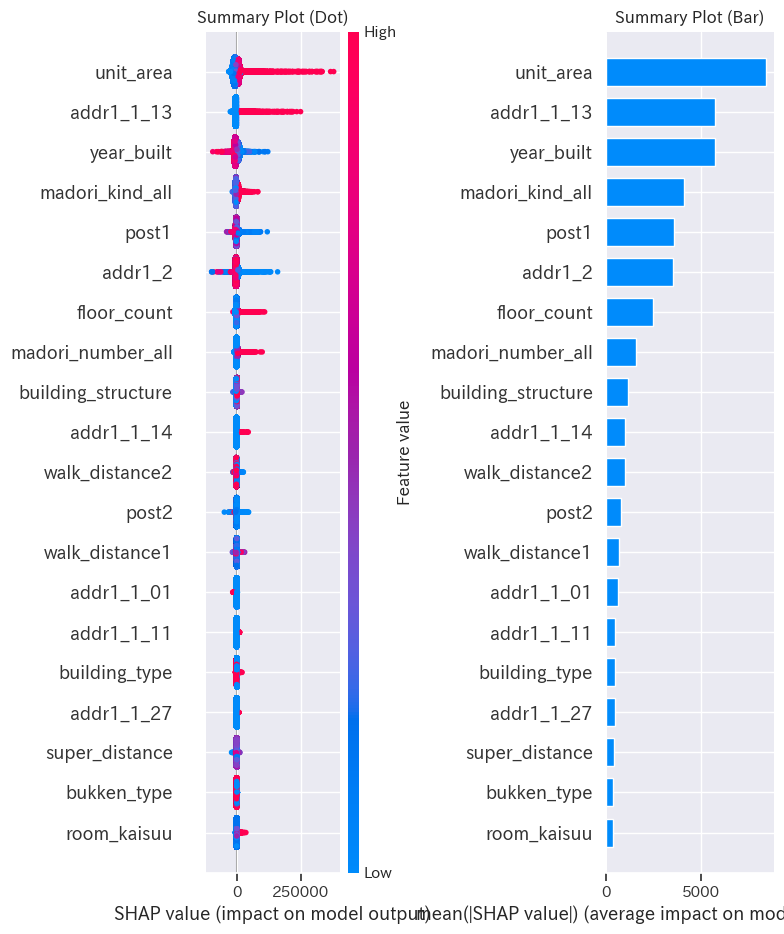

In [ ]:
# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÅÆ‰ΩúÊàêÔºàÊ≠£ÊñπÂΩ¢„Å´Ë®≠ÂÆöÔºâ
fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # 1Ë°å2Âàó„ÅÆ„Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÄÅÊ≠£ÊñπÂΩ¢

# Â∑¶ÂÅ¥„ÅÆÂõ≥: summary_plot
plt.sca(axes[0])  # Â∑¶ÂÅ¥„ÅÆ„Çµ„Éñ„Éó„É≠„ÉÉ„Éà„Çí„Ç¢„ÇØ„ÉÜ„Ç£„Éñ„Å´
shap.summary_plot(shap_values, X_test_shap, plot_type='dot', show=False)
axes[0].set_title("Summary Plot (Dot)", fontsize=12)

# Âè≥ÂÅ¥„ÅÆÂõ≥: bar plot
plt.sca(axes[1])  # Âè≥ÂÅ¥„ÅÆ„Çµ„Éñ„Éó„É≠„ÉÉ„Éà„Çí„Ç¢„ÇØ„ÉÜ„Ç£„Éñ„Å´
shap.summary_plot(shap_values, X_test_shap, plot_type='bar', show=False)
axes[1].set_title("Summary Plot (Bar)", fontsize=12)

# „É¨„Ç§„Ç¢„Ç¶„ÉàË™øÊï¥
plt.tight_layout()

# ÁîªÂÉè„Å®„Åó„Å¶‰øùÂ≠ò
plt.savefig(ouput_folder_path+shap_plot_file, format="jpg", dpi=300)

# „Éó„É≠„ÉÉ„Éà„ÇíË°®Á§∫
plt.show()


#### 4.create submit.csv

In [ ]:
#submit

# Ë©ï‰æ°Áî®„Éá„Éº„Çø„ÅßË≥ÉÊñô„Çí‰∫àÊ∏¨
df_test_model_x = df_test
df_test_model_x = pd.get_dummies(df_test_model_x, dtype='int')

y_pred = model.predict(df_test_model_x)

# y_pred„Åã„Çâ„Éá„Éº„Çø„Éï„É¨„Éº„É†„Çí‰ΩúÊàê
pred_df = pd.DataFrame(y_pred, columns=['money_room'])

# pred_df„ÇíCSVÂá∫Âäõ„ÄÅ„Éò„ÉÉ„ÉÄ„Éº„Å™„Åó
pred_df.to_csv(ouput_folder_path + submit_file, index=True, header=False)

# ‰∫àÊ∏¨ÂÄ§„ÇíÁ¢∫Ë™ç
display(pred_df.head())

money_room
0    64469.65
1    54339.78
2    59374.14
3    48201.79
4    76552.70